# Preprocessing

In [73]:
import pandas as pd
import numpy as np

df_dev = pd.read_csv('data/development.csv').set_index('Id')
df_eval = pd.read_csv('data/evaluation.csv').set_index('Id')

df_dev.drop(['sampling_rate', 'path'], axis=1, inplace=True)
df_eval.drop(['sampling_rate', 'path'], axis=1, inplace=True)

df_dev['tempo'] = df_dev['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df_eval['tempo'] = df_eval['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df_dev['tempo'].dtype, df_eval['tempo'].dtype

df_dev.head(50)

,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration
Id,,,,,,,,,,,,,,,,,
0,24.0,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,151.999081,-123.999726,69,281,39,23.846893
1,22.5,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,129.199219,-86.928478,69,281,21,19.388662
2,22.0,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,117.453835,-98.450670,69,281,1,21.640998
3,22.0,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,117.453835,-56.459762,69,281,9,19.644127
4,22.0,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,112.347147,-80.349204,69,281,11,18.041905
5,33.0,female,italian,1258.52160,3998.8406,145.61612,0.025642,0.093994,0.014001,0.152036,2350.747577,123.046875,-93.453230,69,281,21,19.597642
6,18.0,male,french,1789.02590,3999.5728,145.42523,0.022059,0.138322,0.001402,0.177713,2771.793237,92.285156,-132.864988,69,281,29,21.849977
7,18.0,female,igbo,1042.95260,3989.9595,147.18710,0.013859,0.104579,0.000908,0.111858,2701.802811,215.332031,5.586937,4,16,1,1.367937
8,18.0,female,igbo,779.33765,2927.2144,157.62047,0.013921,0.080848,0.000324,0.039097,1448.093479,143.554688,-43.823950,0,0,1,1.989660


In [74]:
from collections import Counter
print(Counter(df_dev["gender"]))
print(Counter(df_eval["gender"]))

Counter({'female': 1468, 'male': 1465})
Counter({'male': 393, 'female': 297, 'famale': 1})


In [75]:
df_dev = df_dev[df_dev["age"]<=70]

Counter({18.0: 283, 19.0: 235, 21.0: 216, 20.0: 199, 17.0: 194, 22.0: 180, 23.0: 144, 24.0: 118, 26.0: 111, 25.0: 104, 16.0: 89, 29.0: 67, 31.0: 65, 28.0: 57, 27.0: 53, 32.0: 48, 35.0: 45, 30.0: 43, 38.0: 35, 43.0: 31, 15.0: 30, 39.0: 29, 33.0: 28, 36.0: 28, 37.0: 28, 34.0: 27, 52.0: 27, 42.0: 24, 50.0: 23, 40.0: 23, 53.0: 23, 47.0: 22, 46.0: 21, 44.0: 18, 45.0: 17, 48.0: 17, 54.0: 17, 41.0: 16, 57.0: 16, 60.0: 15, 56.0: 15, 49.0: 15, 62.0: 12, 55.0: 12, 51.0: 10, 59.0: 9, 63.0: 7, 65.0: 6, 66.0: 6, 68.0: 6, 64.0: 5, 58.0: 5, 69.0: 4, 70.0: 4, 67.0: 3, 61.0: 2, 22.5: 1, 7.0: 1, 27.5: 1, 15.5: 1, 6.0: 1})


<BarContainer object of 61 artists>

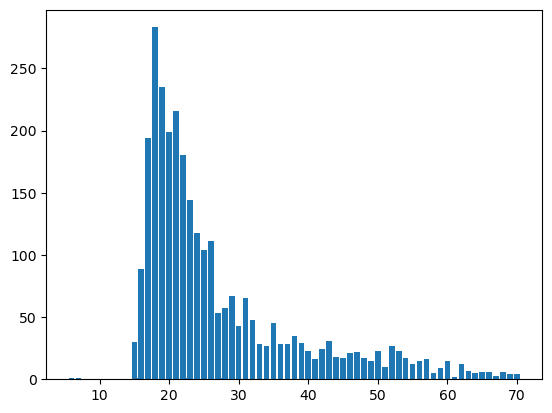

In [76]:
import matplotlib.pyplot as plt
from collections import Counter

temp = Counter(df_dev["age"])
print(temp)

plt.figure()
plt.bar(temp.keys(), temp.values())

Gender

In [77]:
print(df_dev['gender'].value_counts())
print(df_eval['gender'].value_counts())

gender
male      1451
female    1441
Name: count, dtype: int64
gender
male      393
female    297
famale      1
Name: count, dtype: int64


In [78]:
gender =  {'male': 1, 'female': 0, "famale": 0}

# We encode the gender using dummy encoding
df_dev['gender'] = df_dev['gender'].map(gender)
df_eval['gender'] = df_eval['gender'].map(gender)
print(df_dev['gender'].value_counts())
print(df_eval['gender'].value_counts())

gender
1    1451
0    1441
Name: count, dtype: int64
gender
1    393
0    298
Name: count, dtype: int64


Ethnicity

In [79]:
set1 = set(df_dev["ethnicity"])
set2 = set(df_eval["ethnicity"])
set1.intersection(set2)

{'afemai',
 'annang',
 'cameroonian',
 'congolese',
 'hausa',
 'ibibio',
 'igala',
 'igbo',
 'ijaw',
 'ikwerre',
 'indian',
 'kanuri',
 'nigerian',
 'satawalese',
 'ukwani',
 'urhobo',
 'yoruba'}

In [80]:
from collections import defaultdict
temp = defaultdict(lambda: 0)
for el in df_eval["ethnicity"]:
    if el in set1.intersection(set2):
        temp[el] += 1

In [81]:
# We keep only the `igbo` ethicity since it is the only ethnicity which is significantly present
# in both the development and the evaluation dataset

df_dev['igbo'] = df_dev['ethnicity'].apply(lambda z: 1 if z == 'igbo' else 0)
df_dev.drop('ethnicity', axis=1, inplace=True)

df_eval['igbo'] = df_eval['ethnicity'].apply(lambda z: 1 if z == 'igbo' else 0)
df_eval.drop('ethnicity', axis=1, inplace=True)

Energy

In [82]:
# We apply the log function to obtain a greater spread of values. 
df_dev['energy'] = df_dev['energy'].apply(np.log)
df_eval['energy'] = df_eval['energy'].apply(np.log)

Pitch

In [83]:
df_dev.drop(["max_pitch","mean_pitch"], axis='columns', inplace=True)
df_eval.drop(["max_pitch", "mean_pitch"], axis="columns", inplace=True)

In [84]:
df_dev['jitter'] = df_dev['jitter'].apply(np.log)
df_eval['jitter'] = df_eval['jitter'].apply(np.log)

df_dev['shimmer'] = df_dev['shimmer'].apply(np.log)
df_eval['shimmer'] = df_eval['shimmer'].apply(np.log)

df_dev['min_pitch'] = df_dev['min_pitch'].apply(np.log)
df_eval['min_pitch'] = df_eval['min_pitch'].apply(np.log)

df_dev['zcr_mean'] = df_dev['zcr_mean'].apply(np.log)
df_eval['zcr_mean'] = df_eval['zcr_mean'].apply(np.log)

df_dev['spectral_centroid_mean'] = df_dev['spectral_centroid_mean'].apply(np.log)
df_eval['spectral_centroid_mean'] = df_eval['spectral_centroid_mean'].apply(np.log)

df_dev['tempo'] = df_dev['tempo'].apply(np.log)
df_eval['tempo'] = df_eval['tempo'].apply(np.log)

df_dev['num_pauses'] = df_dev['num_pauses'].apply(np.log)
df_eval['num_pauses'] = df_eval['num_pauses'].apply(np.log)

df_dev['silence_duration'] = df_dev['silence_duration'].apply(np.log)
df_eval['silence_duration'] = df_eval['silence_duration'].apply(np.log)

In [85]:
df_dev.drop(["num_words","min_pitch","shimmer", "energy"], axis='columns', inplace=True)
df_eval.drop(["num_words","min_pitch","shimmer", "energy"], axis="columns", inplace=True)

# Model Selection

In [86]:
df_dev.head()

,age,gender,jitter,zcr_mean,spectral_centroid_mean,tempo,hnr,num_characters,num_pauses,silence_duration,igbo
Id,,,,,,,,,,,
0,24.0,0,-4.283485,-1.560203,8.043104,5.023874,-123.999726,281,3.663562,3.171654,0
1,22.5,0,-3.675035,-2.540216,7.431309,4.861356,-86.928478,281,3.044522,2.964688,0
2,22.0,0,-3.959774,-2.250323,7.854343,4.766045,-98.450670,281,0.000000,3.074590,0
3,22.0,0,-4.074326,-1.750419,8.092469,4.766045,-56.459762,281,2.197225,2.977778,0
4,22.0,1,-3.574572,-2.232318,7.565740,4.721594,-80.349204,281,2.397895,2.892697,0


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

y_dev = df_dev["age"]
X_dev = df_dev.drop(columns=["age"])
X_dev.head()
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, random_state=0, test_size=0.2)
X_test = df_eval

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

<Axes: >

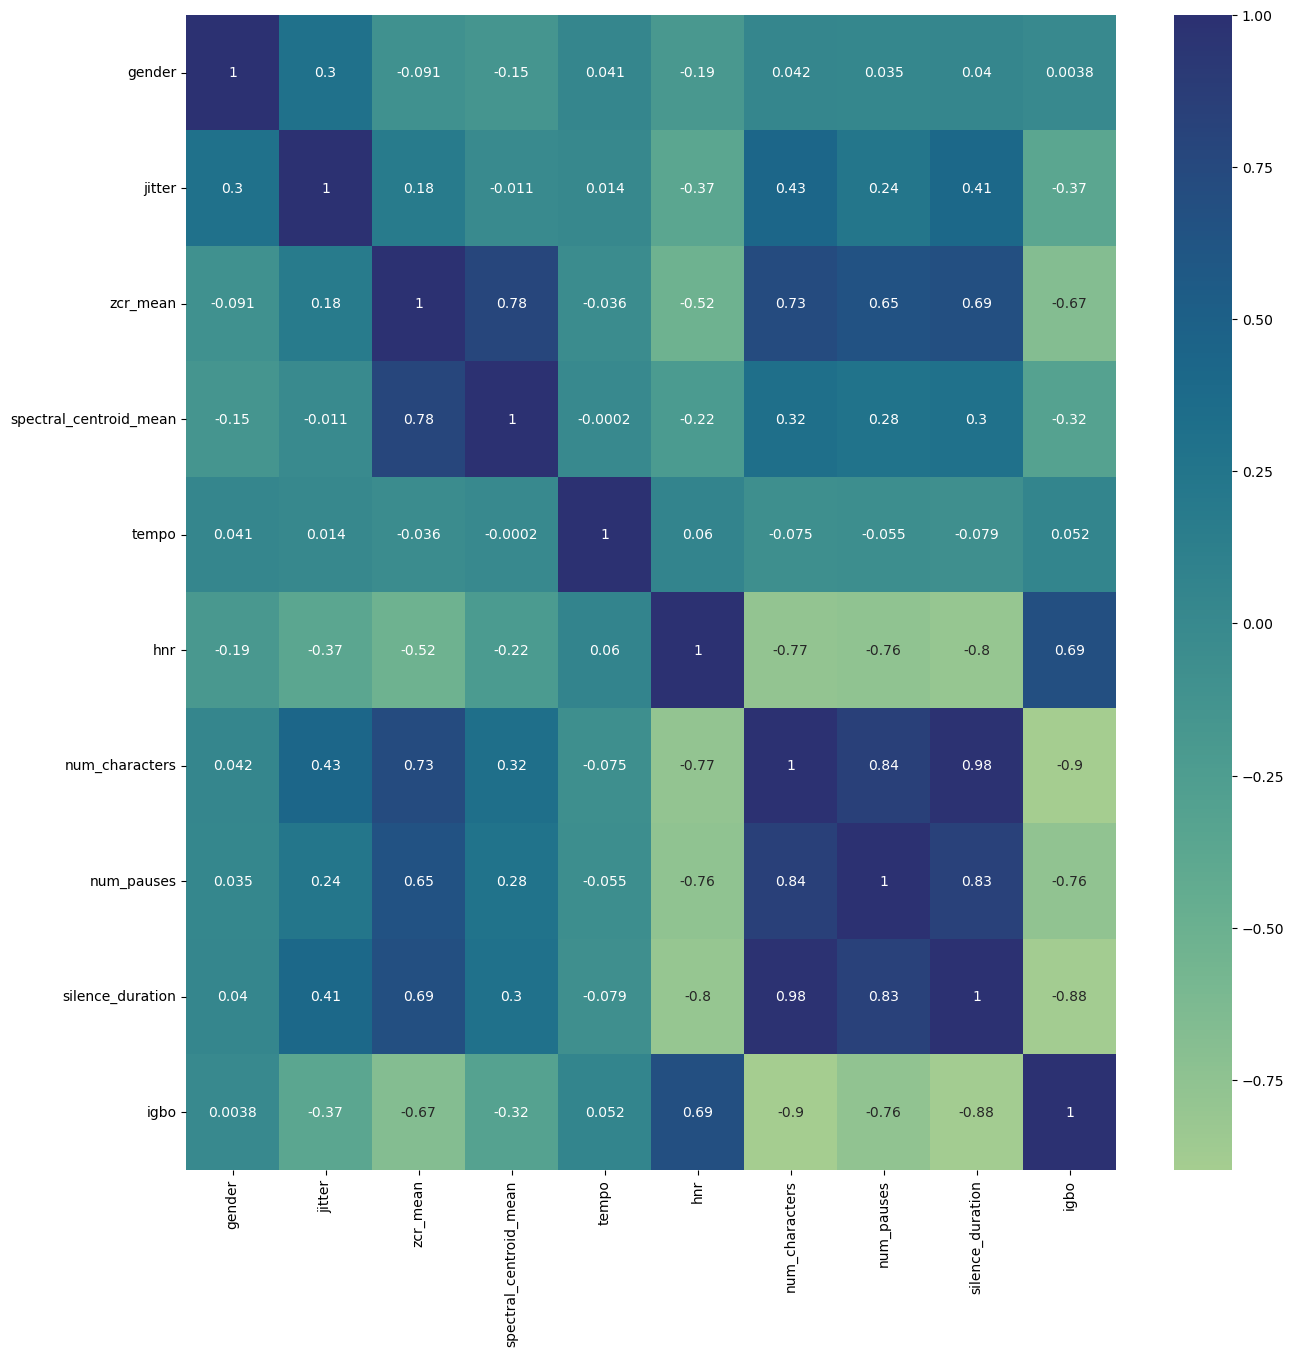

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(X_dev.corr(), cmap="crest", annot=True)

In [89]:
reg = RandomForestRegressor(random_state=0, n_jobs=-1, criterion="squared_error", n_estimators=200) # squared error since if small also RMSE is small

reg.fit(X_train,y_train)

y_pred = reg.predict(X_val)

from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_val, y_pred)

np.float64(10.248589719443276)

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

for model in [LinearRegression, Lasso, Ridge, RandomForestRegressor, SVR, DecisionTreeRegressor, KNeighborsRegressor, MLPRegressor]:
    reg = model()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f'{model.__name__} RMSE: {rmse}')

LinearRegression RMSE: 10.244509851005306
Lasso RMSE: 10.592039678358585
Ridge RMSE: 10.246261587529423
RandomForestRegressor RMSE: 10.191688178569253
SVR RMSE: 10.955692115821604
DecisionTreeRegressor RMSE: 14.120854505009277
KNeighborsRegressor RMSE: 10.574742613754259
MLPRegressor RMSE: 10.060404717687053


c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Choose best model

In [91]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(2)
X_train = polynomial.fit_transform(X_train)
# reg = LinearRegression()
reg = Ridge(alpha=35)
reg.fit(X_train, y_train)
y_pred = reg.predict(polynomial.transform(X_val))
# y_pred = reg.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'RMSE: {rmse}')

RMSE: 10.096163139918538


# Train on all

In [97]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import QuantileRegressor
from sklearn.feature_selection import RFECV

y_dev = df_dev["age"]
X_dev = df_dev.drop(columns=["age"])
X_test = df_eval

ss = StandardScaler()
# ss = MinMaxScaler()
X_dev = ss.fit_transform(X_dev)
X_test = ss.transform(X_test)

polynomial = PolynomialFeatures(2)
X_dev = polynomial.fit_transform(X_dev)
X_test = polynomial.transform(X_test)

# reg = LinearRegression()
reg = Ridge()

RFECV = RFECV(reg, step=1, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
RFECV.fit(X_dev, y_dev)

print("Optimal number of features: %d" % RFECV.n_features_)
print("Selected features: %s" % RFECV.support_)
print("Feature ranking: %s" % RFECV.ranking_)

X_dev = X_dev[:, RFECV.support_]
X_test = X_test[:, RFECV.support_]

reg = Ridge()

grid = {
    "alpha": np.arange(0.1,5, 0.1),
    # "n_estimators": [100,200,250,300]
}
gridSearch = GridSearchCV(reg, grid, n_jobs=-1, verbose=6, cv=20, scoring="neg_root_mean_squared_error")
gridSearch.fit(X_dev, y_dev)
reg = gridSearch.best_estimator_
print(gridSearch.best_estimator_)
print(gridSearch.best_params_)
print(gridSearch.best_score_)

# reg = Ridge(1)
# reg.fit(X_dev, y_dev)
y_pred = reg.predict(X_test)

Optimal number of features: 28
Selected features: [False False  True  True  True False  True  True False  True  True False
 False  True  True False False  True False  True False False False False
 False False False  True False False False False False False  True  True
  True  True False False False False False  True False False False  True
 False  True False False  True False  True False  True  True  True  True
 False  True False  True  True False]
Feature ranking: [39 18  1  1  1 31  1  1 10  1  1 38 27  1  1 29 30  1 26  1 14 35 12 13
 32 21 20  1 19 34  6 22 16 24  1  1  1  1 23 17 25  2 11  1  3 33  9  1
  8  1 36 37  1  4  1 28  1  1  1  1  5  1  7  1  1 15]
Fitting 20 folds for each of 49 candidates, totalling 980 fits
Ridge(alpha=np.float64(0.30000000000000004))
{'alpha': np.float64(0.30000000000000004)}
-9.469257867395813


In [93]:
(y_pred<0).sum()

np.int64(0)

In [94]:
y_pred.max()

np.float64(48.24896626989265)

In [98]:
import pandas as pd

dataFrameOutput = pd.DataFrame({"Predicted": np.round(y_pred,2)})

dataFrameOutput.index.name = "Id"
dataFrameOutput.to_csv("./data/output.csv")